# Credit Default Problem
In this notebook, we will use the customer tax records to predict whether a customer will default on their loans. 



In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#define the variables
N=10000
p0 = 0.8
u0 = -1
u1 = 1
s0 = 1
s1 = 1

In [4]:
def generateSamples(N, p0, u0, u1, s0, s1):
    samples = []
    for i in range(N):
        y = np.random.binomial(1, 1-p0, 1)
        if y == 1:
            x = np.random.normal(u1, s1, 1)
        else:
            x = np.random.normal(u0, s0, 1)
        samples.append([x[0], y[0]])
    #convert to dataframe
    df = pd.DataFrame(samples, columns=['x', 'label'])
    return df

In [5]:
samples = generateSamples(N, p0, u0, u1, s0, s1)
samples.head()

,x,label
0,-0.302906,1
1,-2.356664,0
2,-2.318994,0
3,-0.825245,0
4,-0.286000,0


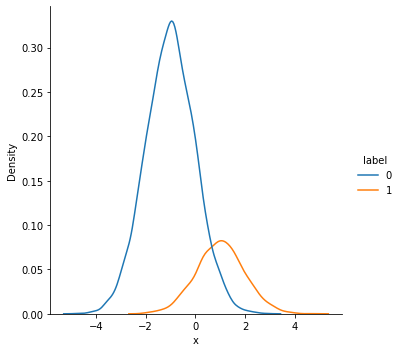

In [6]:
# lets see the synthetic data is generated as expected

# plot the distribution of the data for each class on the same plot

sns.displot(samples, x="x", hue="label", kind="kde")

In [1]:
#computing normal density
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
#predict
def predict(x):
    #calculate posteriors
    q0 = p0*normal_dist(x, u0, s0) / (p0*(normal_dist(x, u0, s0) + (1-p0)*normal_dist(x, u1, s1)))
    if q0 >= 0.5:
        return 0
    return 1

def getAccuracy(X,Y):
    correct =0
    for i in range(N):
        if predict(X[i]) == Y[i]:
            correct+=1
    return correct/N

In [9]:
print(getAccuracy(samples['x'],samples['label']))

0.8885
